In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import re

%matplotlib inline
sns.set_palette("pastel")

## World Bank data related to trade flows

### exploring the data, format, values and other aspects of it to clean it thereafter and conduct timely analysis

In [2]:
countries = pd.read_csv('Data_World_Bank/Countries.csv')
definitions = pd.read_csv('Data_World_Bank/Definitions.csv')


In [3]:
# Checking datatypes and exploring datq
countries.dtypes

Country Name      object
Country Code      object
Series Name       object
Series Code       object
1960 [YR1960]     object
                  ...   
2015 [YR2015]    float64
2016 [YR2016]    float64
2017 [YR2017]    float64
2018 [YR2018]    float64
2019 [YR2019]     object
Length: 64, dtype: object

In [4]:
definitions.dtypes

Code                                   object
License Type                           object
Indicator Name                         object
Long definition                        object
Source                                 object
Topic                                  object
Periodicity                            object
Aggregation method                     object
Statistical concept and methodology    object
Development relevance                  object
Limitations and exceptions             object
General comments                       object
License URL                            object
dtype: object

In [5]:
countries.head(5)

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Brazil,BRA,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,7.11728554327239,7.33945907077904,5.18897394767796,9.11100002127562,5.6776000056402,5.55592484290456,...,1.190659e+01,1.235190e+01,1.323673e+01,1.404375e+01,1.367346e+01,1.405345e+01,1.206702e+01,1.180464e+01,1.450808e+01,14.6542047944056
1,Brazil,BRA,Imports of goods and services (annual % growth),NE.IMP.GNFS.KD.ZG,..,-3.48843308833531,-1.20431186245116,-2.43879567951019,-12.5004082704348,-14.2862484150039,...,3.363902e+01,9.393401e+00,1.130844e+00,6.669913e+00,-2.272397e+00,-1.419079e+01,-1.034242e+01,6.716699e+00,8.344300e+00,1.10519476327453
2,Brazil,BRA,"Imports of goods and services (BoP, current US$)",BM.GSR.GNFS.CD,..,..,..,..,..,..,...,2.436609e+11,3.020294e+11,3.038480e+11,3.255714e+11,3.187991e+11,2.431456e+11,2.034268e+11,2.265149e+11,2.576635e+11,254149123847.62
3,Brazil,BRA,Imports of goods and services (current US$),NE.IMP.GNFS.CD,1079376914.93865,1118302726.08473,1033970196.04432,2097486800.99115,1204326396.14961,1210637974.35359,...,2.630014e+11,3.231504e+11,3.263105e+11,3.472747e+11,3.358194e+11,2.532733e+11,2.166875e+11,2.435097e+11,2.735474e+11,269601911015.338
4,Brazil,BRA,"Service imports (BoP, current US$)",BM.GSR.NFSV.CD,..,..,..,..,..,..,...,6.082783e+10,7.414858e+10,7.898443e+10,8.438271e+10,8.807214e+10,7.072337e+10,6.374707e+10,7.240564e+10,7.117370e+10,69110223405.55


In [6]:
definitions.head(5)

,Code,License Type,Indicator Name,Long definition,Source,Topic,Periodicity,Aggregation method,Statistical concept and methodology,Development relevance,Limitations and exceptions,General comments,License URL
0,NE.IMP.GNFS.ZS,CC BY-4.0,Imports of goods and services (% of GDP),Imports of goods and services represent the va...,"World Bank national accounts data, and OECD Na...",Economic Policy & Debt: National accounts: Sha...,Annual,Weighted average,Gross domestic product (GDP) from the expendit...,NaN,Because policymakers have tended to focus on f...,NaN,https://datacatalog.worldbank.org/public-licen...
1,NE.IMP.GNFS.KD.ZG,CC BY-4.0,Imports of goods and services (annual % growth),Annual growth rate of imports of goods and ser...,"World Bank national accounts data, and OECD Na...",Economic Policy & Debt: National accounts: Gro...,Annual,Weighted average,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
2,BM.GSR.GNFS.CD,CC BY-4.0,"Imports of goods and services (BoP, current US$)",Imports of goods and services comprise all tra...,"International Monetary Fund, Balance of Paymen...",Economic Policy & Debt: Balance of payments: C...,Annual,Gap-filled total,The balance of payments (BoP) is a double-entr...,The balance of payments records an economy’s t...,Discrepancies may arise in the balance of paym...,Note: Data are based on the sixth edition of t...,https://datacatalog.worldbank.org/public-licen...
3,NE.IMP.GNFS.CD,CC BY-4.0,Imports of goods and services (current US$),Imports of goods and services represent the va...,"World Bank national accounts data, and OECD Na...",Economic Policy & Debt: National accounts: US$...,Annual,Gap-filled total,Gross domestic product (GDP) from the expendit...,NaN,Because policymakers have tended to focus on f...,NaN,https://datacatalog.worldbank.org/public-licen...
4,BM.GSR.NFSV.CD,CC BY-4.0,"Service imports (BoP, current US$)",Services refer to economic output of intangibl...,"International Monetary Fund, Balance of Paymen...",Economic Policy & Debt: Balance of payments: C...,Annual,Gap-filled total,NaN,NaN,NaN,Note: Data are based on the sixth edition of t...,https://datacatalog.worldbank.org/public-licen...


In [7]:
countries.shape

(109, 64)

In [8]:
# All values are objects. Corresponding columns will be afterwards turned into floats and rounded to have better handling. 
countries.dtypes

Country Name      object
Country Code      object
Series Name       object
Series Code       object
1960 [YR1960]     object
                  ...   
2015 [YR2015]    float64
2016 [YR2016]    float64
2017 [YR2017]    float64
2018 [YR2018]    float64
2019 [YR2019]     object
Length: 64, dtype: object

In [9]:
pd.set_option('display.max_rows', None)

In [10]:
# Using years as rows for countries dataset
countries = countries.transpose()


In [11]:
nulls_countries = countries.columns[countries.isnull().any()].tolist()

In [12]:
nulls_countries

[104, 105, 106, 107, 108]

In [13]:
# Looking into the columns with null values
countries[[104]]

,104
Country Name,NaN
Country Code,NaN
Series Name,NaN
Series Code,NaN
1960 [YR1960],NaN
1961 [YR1961],NaN
1962 [YR1962],NaN
1963 [YR1963],NaN
1964 [YR1964],NaN
1965 [YR1965],NaN


In [14]:
for n in nulls_countries:
    print(countries[n].isnull().sum()/100)

0.64
0.64
0.64
0.63
0.63


In [15]:
#Drop columns with NAN values
countries = countries.drop(nulls_countries, axis=1)

## Fixing index 

In [16]:
countries.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             94,  95,  96,  97,  98,  99, 100, 101, 102, 103],
           dtype='int64', length=104)

In [17]:
countries

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
Country Name,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,...,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia
Country Code,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,...,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN
Series Name,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Imports of goods and services (BoP, current US$)",Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),...,Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),"Goods exports (BoP, current US$)","Service exports (BoP, current US$)","GDP per capita, PPP (current international $)"
Series Code,NE.IMP.GNFS.ZS,NE.IMP.GNFS.KD.ZG,BM.GSR.GNFS.CD,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,...,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,BX.GSR.MRCH.CD,BX.GSR.NFSV.CD,NY.GDP.PCAP.PP.CD
1960 [YR1960],7.11728554327239,..,..,1079376914.93865,..,..,7.05904647646368,..,..,1070544628.54537,...,..,..,..,11.5325474115838,..,..,..,..,..,..
1961 [YR1961],7.33945907077904,-3.48843308833531,..,1118302726.08473,..,..,7.27940794590105,5.19408591869809,..,1109152823.34559,...,..,..,..,11.0614762816422,9.03846153842458,..,..,..,..,..
1962 [YR1962],5.18897394767796,-1.20431186245116,..,1033970196.04432,..,..,3.86876017137378,-7.40697094349359,..,770900519.674771,...,..,..,..,5.1681521983372,-8.64197530862099,..,..,..,..,..
1963 [YR1963],9.11100002127562,-2.43879567951019,..,2097486800.99115,..,..,9.03645424482606,27.9999537191722,..,2080325261.99351,...,..,..,..,9.06881077038145,-5.98455598453009,..,..,..,..,..
1964 [YR1964],5.6776000056402,-12.5004082704348,..,1204326396.14961,..,..,6.38540927082227,-13.5418615762703,..,1354466134.88626,...,..,..,..,12.2520501857433,11.9096509240471,..,..,..,..,..
1965 [YR1965],5.55592484290456,-14.2862484150039,..,1210637974.35359,..,..,7.73576138413985,3.61684823505183,..,1685625122.1861,...,..,..,..,5.2762547448334,3.11926605503989,..,..,..,..,..


In [18]:
countries.columns=countries.iloc[0]

In [19]:
countries = countries.drop(countries.index[0])

In [20]:
countries

Country Name,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,...,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia
Country Code,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,...,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN
Series Name,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Imports of goods and services (BoP, current US$)",Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),...,Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),"Goods exports (BoP, current US$)","Service exports (BoP, current US$)","GDP per capita, PPP (current international $)"
Series Code,NE.IMP.GNFS.ZS,NE.IMP.GNFS.KD.ZG,BM.GSR.GNFS.CD,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,...,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,BX.GSR.MRCH.CD,BX.GSR.NFSV.CD,NY.GDP.PCAP.PP.CD
1960 [YR1960],7.11728554327239,..,..,1079376914.93865,..,..,7.05904647646368,..,..,1070544628.54537,...,..,..,..,11.5325474115838,..,..,..,..,..,..
1961 [YR1961],7.33945907077904,-3.48843308833531,..,1118302726.08473,..,..,7.27940794590105,5.19408591869809,..,1109152823.34559,...,..,..,..,11.0614762816422,9.03846153842458,..,..,..,..,..
1962 [YR1962],5.18897394767796,-1.20431186245116,..,1033970196.04432,..,..,3.86876017137378,-7.40697094349359,..,770900519.674771,...,..,..,..,5.1681521983372,-8.64197530862099,..,..,..,..,..
1963 [YR1963],9.11100002127562,-2.43879567951019,..,2097486800.99115,..,..,9.03645424482606,27.9999537191722,..,2080325261.99351,...,..,..,..,9.06881077038145,-5.98455598453009,..,..,..,..,..
1964 [YR1964],5.6776000056402,-12.5004082704348,..,1204326396.14961,..,..,6.38540927082227,-13.5418615762703,..,1354466134.88626,...,..,..,..,12.2520501857433,11.9096509240471,..,..,..,..,..
1965 [YR1965],5.55592484290456,-14.2862484150039,..,1210637974.35359,..,..,7.73576138413985,3.61684823505183,..,1685625122.1861,...,..,..,..,5.2762547448334,3.11926605503989,..,..,..,..,..
1966 [YR1966],5.99166922704867,31.6662865082342,..,1621508461.2021,..,..,6.82473507896306,11.6278405073585,..,1846958711.61305,...,..,..,..,12.7572016460905,-1.06761565839287,..,..,..,..,..


### Making each country into a dataframe because per country each column's name has the name of the country

In [21]:
# Initial idea on how to seperate each country in a dataframe
countries.filter(like='Brazil')

Country Name,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil,Brazil
Country Code,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA,BRA
Series Name,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Imports of goods and services (BoP, current US$)",Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),"Goods exports (BoP, current US$)","Service exports (BoP, current US$)","GDP per capita, PPP (current international $)"
Series Code,NE.IMP.GNFS.ZS,NE.IMP.GNFS.KD.ZG,BM.GSR.GNFS.CD,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,BX.GSR.MRCH.CD,BX.GSR.NFSV.CD,NY.GDP.PCAP.PP.CD
1960 [YR1960],7.11728554327239,..,..,1079376914.93865,..,..,7.05904647646368,..,..,1070544628.54537,..,..,..
1961 [YR1961],7.33945907077904,-3.48843308833531,..,1118302726.08473,..,..,7.27940794590105,5.19408591869809,..,1109152823.34559,..,..,..
1962 [YR1962],5.18897394767796,-1.20431186245116,..,1033970196.04432,..,..,3.86876017137378,-7.40697094349359,..,770900519.674771,..,..,..
1963 [YR1963],9.11100002127562,-2.43879567951019,..,2097486800.99115,..,..,9.03645424482606,27.9999537191722,..,2080325261.99351,..,..,..
1964 [YR1964],5.6776000056402,-12.5004082704348,..,1204326396.14961,..,..,6.38540927082227,-13.5418615762703,..,1354466134.88626,..,..,..
1965 [YR1965],5.55592484290456,-14.2862484150039,..,1210637974.35359,..,..,7.73576138413985,3.61684823505183,..,1685625122.1861,..,..,..
1966 [YR1966],5.99166922704867,31.6662865082342,..,1621508461.2021,..,..,6.82473507896306,11.6278405073585,..,1846958711.61305,..,..,..


In [22]:
countries_columns = list(countries.columns.unique())

In [23]:
countries_columns

['Brazil',
 'Argentina',
 'Mexico',
 'Chile',
 'Hong Kong SAR, China',
 'Singapore',
 'Korea, Rep.',
 'Indonesia']

In [24]:
country = {}
for name in countries_columns:
    country[name] = pd.DataFrame(countries.filter(like=name))

In [25]:
country['Argentina']

Country Name,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina
Country Code,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG,ARG
Series Name,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Imports of goods and services (BoP, current US$)",Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),"Goods exports (BoP, current US$)","Service exports (BoP, current US$)","GDP per capita, PPP (current international $)"
Series Code,NE.IMP.GNFS.ZS,NE.IMP.GNFS.KD.ZG,BM.GSR.GNFS.CD,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,BX.GSR.MRCH.CD,BX.GSR.NFSV.CD,NY.GDP.PCAP.PP.CD
1960 [YR1960],7.60404697912324,..,..,..,..,..,7.60404910825644,..,..,..,..,..,..
1961 [YR1961],5.99494531619397,18.1768928497726,..,..,..,..,5.9949469947787,-10.6385917324185,..,..,..,..,..
1962 [YR1962],9.38368289056535,0,..,2294367226.53985,..,..,4.69184275899831,45.2384632307518,..,1147183934.48134,..,..,..
1963 [YR1963],7.89045203275027,-23.0833969136606,..,1441753153.10994,..,..,7.89045420262462,0,..,1441753549.59206,..,..,..
1964 [YR1964],5.56371407476368,20.0123928703162,..,1424602863.7313,..,..,5.56371560478508,-8.19666133346863,..,1424603255.4971,..,..,..
1965 [YR1965],4.15058297228058,0,..,1176470539.39431,..,..,6.22587443766796,8.92850026211178,..,1764705803.20912,..,..,..
1966 [YR1966],4.98968803354159,-8.3311443548433,..,1428571371.44429,..,..,6.65291738359955,16.3934313399595,..,1904761830.17968,..,..,..


## Renaming columns

In [26]:
type(country['Argentina'])

pandas.core.frame.DataFrame

In [27]:
#column identifiers
(country['Argentina']).loc['Series Name',:]

Country Name
Argentina            Imports of goods and services (% of GDP)
Argentina     Imports of goods and services (annual % growth)
Argentina    Imports of goods and services (BoP, current US$)
Argentina         Imports of goods and services (current US$)
Argentina                  Service imports (BoP, current US$)
Argentina                    Goods imports (BoP, current US$)
Argentina            Exports of goods and services (% of GDP)
Argentina     Exports of goods and services (annual % growth)
Argentina    Exports of goods and services (BoP, current US$)
Argentina         Exports of goods and services (current US$)
Argentina                    Goods exports (BoP, current US$)
Argentina                  Service exports (BoP, current US$)
Argentina       GDP per capita, PPP (current international $)
Name: Series Name, dtype: object

### The meaning of the new column names to be used as reference

|Column Identifier | Meaning |
| --- | --- |
| IM_GDP_P | Imports of goods and services (% of GDP) |
| IM_Growth_P | Imports of goods and services (annual % growth) |
| IM_BoP | Imports of goods and services (current US dollar) |
| IM_dll | Imports of goods and services (current US dollar) |
| IM_Services_dll | Service imports (BoP, current US dollar) |
| IM_Goods_dll | Goods imports (BoP, current US dollar) |
| EX_GDP_P | Exports of goods and services (% of GDP) |
| EX_Growth_P | Exports of goods and services (annual % growth) |
| EX_BoP | Exports of goods and services (BoP, current US dollar) |
| EX_dll | Exports of goods and services (current US dollar) |
| EX_Goods_dll | Goods exports (BoP, current US dollar) |
| EX_Services_dll | Service exports (BoP, current US dollar) | 
| GDP_PPP | GDP per capita, PPP (current international dollar) |


In [28]:
column_names = ['IM_GDP_P', 'IM_Growth_P', 'IM_BoP', 'IM_dll', 'IM_Services_dll', 'IM_Goods_dll', 'EX_GDP_P', 'EX_Growth_P', 'EX_BoP', 'EX_dll', 'EX_Goods_dll', 'EX_Services_dll', 'GDP_PPP' ]

In [29]:
(country['Argentina']).columns = column_names

In [30]:
# renaming columns for each country dataframe
for cols in countries_columns:
    (country[cols]).columns = column_names

In [31]:
country['Indonesia']

,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Goods_dll,EX_Services_dll,GDP_PPP
Country Code,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN,IDN
Series Name,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Imports of goods and services (BoP, current US$)",Imports of goods and services (current US$),"Service imports (BoP, current US$)","Goods imports (BoP, current US$)",Exports of goods and services (% of GDP),Exports of goods and services (annual % growth),"Exports of goods and services (BoP, current US$)",Exports of goods and services (current US$),"Goods exports (BoP, current US$)","Service exports (BoP, current US$)","GDP per capita, PPP (current international $)"
Series Code,NE.IMP.GNFS.ZS,NE.IMP.GNFS.KD.ZG,BM.GSR.GNFS.CD,NE.IMP.GNFS.CD,BM.GSR.NFSV.CD,BM.GSR.MRCH.CD,NE.EXP.GNFS.ZS,NE.EXP.GNFS.KD.ZG,BX.GSR.GNFS.CD,NE.EXP.GNFS.CD,BX.GSR.MRCH.CD,BX.GSR.NFSV.CD,NY.GDP.PCAP.PP.CD
1960 [YR1960],12.5576627370579,..,..,..,..,..,11.5325474115838,..,..,..,..,..,..
1961 [YR1961],13.6141246543289,34.6938775511049,..,..,..,..,11.0614762816422,9.03846153842458,..,..,..,..,..
1962 [YR1962],5.39285446783012,-1.96969696971165,..,..,..,..,5.1681521983372,-8.64197530862099,..,..,..,..,..
1963 [YR1963],9.34928945400149,-26.5842349304464,..,..,..,..,9.06881077038145,-5.98455598453009,..,..,..,..,..
1964 [YR1964],13.0651153010444,8.84210526294696,..,..,..,..,12.2520501857433,11.9096509240471,..,..,..,..,..
1965 [YR1965],5.73597638127372,-8.12379110233644,..,..,..,..,5.2762547448334,3.11926605503989,..,..,..,..,..
1966 [YR1966],22.0955998733777,-4.2105263157203,..,..,..,..,12.7572016460905,-1.06761565839287,..,..,..,..,..


## Exploring the null values

In [32]:
country['Argentina'].isnull().sum()

IM_GDP_P           0
IM_Growth_P        0
IM_BoP             0
IM_dll             0
IM_Services_dll    0
IM_Goods_dll       0
EX_GDP_P           0
EX_Growth_P        0
EX_BoP             0
EX_dll             0
EX_Goods_dll       0
EX_Services_dll    0
GDP_PPP            0
dtype: int64

In [33]:
country['Argentina'].isin(['..']).any()

IM_GDP_P           False
IM_Growth_P         True
IM_BoP              True
IM_dll              True
IM_Services_dll     True
IM_Goods_dll        True
EX_GDP_P           False
EX_Growth_P         True
EX_BoP              True
EX_dll              True
EX_Goods_dll        True
EX_Services_dll     True
GDP_PPP             True
dtype: bool

In [34]:
#countries missing data until 1989

#Reason according to the World Bank:
#'Government finance statistics uses updated indicator definitions and 
#methodology which only allowed for a consistent time series beginning 
#no earlier than 1990.'
country['Indonesia'][country['Indonesia'].isin(['..'])].stack()

1960 [YR1960]  IM_Growth_P        ..
               IM_BoP             ..
               IM_dll             ..
               IM_Services_dll    ..
               IM_Goods_dll       ..
               EX_Growth_P        ..
               EX_BoP             ..
               EX_dll             ..
               EX_Goods_dll       ..
               EX_Services_dll    ..
               GDP_PPP            ..
1961 [YR1961]  IM_BoP             ..
               IM_dll             ..
               IM_Services_dll    ..
               IM_Goods_dll       ..
               EX_BoP             ..
               EX_dll             ..
               EX_Goods_dll       ..
               EX_Services_dll    ..
               GDP_PPP            ..
1962 [YR1962]  IM_BoP             ..
               IM_dll             ..
               IM_Services_dll    ..
               IM_Goods_dll       ..
               EX_BoP             ..
               EX_dll             ..
               EX_Goods_dll       ..
 

In [35]:
# All contries missing: 1960 Imports of goods and services (annual % growth)
# Hong Kong missing 1960 and 1961
country['Indonesia']['IM_dll']

Country Code                                             IDN
Series Name      Imports of goods and services (current US$)
Series Code                                   NE.IMP.GNFS.CD
1960 [YR1960]                                             ..
1961 [YR1961]                                             ..
1962 [YR1962]                                             ..
1963 [YR1963]                                             ..
1964 [YR1964]                                             ..
1965 [YR1965]                                             ..
1966 [YR1966]                                             ..
1967 [YR1967]                                955991035.87029
1968 [YR1968]                               1102291012.28399
1969 [YR1969]                                1236196319.0184
1970 [YR1970]                               1449315068.49315
1971 [YR1971]                               1553301761.83894
1972 [YR1972]                               2078072289.15663
1973 [YR1973]           

Table showing when the columns with '..' start showing data. This table will be used as reference to be able to turn the '..' into zeroes and transform the object values into floats.

| Measure Imports & Exports| Data available since year |
| --- | --- |
| GDP Growth | 1960s |
| Goods and services % growth | 1961 |
| Balance of Payments in dlls | 1981 |
| Current dll value | 1967 |
| Services in dlls | 1981 |
| Goods in dlls | 1981 |

In [36]:
# THINK OF HOW TO ITERATE THROUGH THE DIFFERENT COUNTRIES AND KEEP THE NAME 
for zero in countries_columns:
    print(country[zero][country[zero].isin(['0'])].stack())

1985 [YR1985]  IM_Growth_P    0
dtype: object
1962 [YR1962]  IM_Growth_P    0
1963 [YR1963]  EX_Growth_P    0
1965 [YR1965]  IM_Growth_P    0
1967 [YR1967]  IM_Growth_P    0
               EX_Growth_P    0
dtype: object
Series([], dtype: object)
Series([], dtype: object)
1960 [YR1960]  IM_GDP_P    0
               IM_dll      0
               EX_GDP_P    0
               EX_dll      0
dtype: object
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)


## Replacing '..' and turning corresponding values to floats

In [37]:
country['Argentina'].shape

(63, 13)

In [38]:
# Replacing '..' with zeroes
for dots in countries_columns:
    country[dots] = country[dots].replace('..', 0)

In [39]:
# First three rows are objects. Slicing the dataframe to consider numeric 
# values and converting values to floats 
for objects in countries_columns:
    country[objects] = country[objects].iloc[3:63,:].astype(float).round(4)


In [40]:
country['Argentina'].dtypes

IM_GDP_P           float64
IM_Growth_P        float64
IM_BoP             float64
IM_dll             float64
IM_Services_dll    float64
IM_Goods_dll       float64
EX_GDP_P           float64
EX_Growth_P        float64
EX_BoP             float64
EX_dll             float64
EX_Goods_dll       float64
EX_Services_dll    float64
GDP_PPP            float64
dtype: object

In [41]:
country['Argentina']

,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Goods_dll,EX_Services_dll,GDP_PPP
1960 [YR1960],7.6040,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.6040,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000
1961 [YR1961],5.9949,18.1769,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.9949,-10.6386,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000
1962 [YR1962],9.3837,0.0000,0.000000e+00,2.294367e+09,0.000000e+00,0.000000e+00,4.6918,45.2385,0.000000e+00,1.147184e+09,0.000000e+00,0.000000e+00,0.0000
1963 [YR1963],7.8905,-23.0834,0.000000e+00,1.441753e+09,0.000000e+00,0.000000e+00,7.8905,0.0000,0.000000e+00,1.441754e+09,0.000000e+00,0.000000e+00,0.0000
1964 [YR1964],5.5637,20.0124,0.000000e+00,1.424603e+09,0.000000e+00,0.000000e+00,5.5637,-8.1967,0.000000e+00,1.424603e+09,0.000000e+00,0.000000e+00,0.0000
1965 [YR1965],4.1506,0.0000,0.000000e+00,1.176471e+09,0.000000e+00,0.000000e+00,6.2259,8.9285,0.000000e+00,1.764706e+09,0.000000e+00,0.000000e+00,0.0000
1966 [YR1966],4.9897,-8.3311,0.000000e+00,1.428571e+09,0.000000e+00,0.000000e+00,6.6529,16.3934,0.000000e+00,1.904762e+09,0.000000e+00,0.000000e+00,0.0000
1967 [YR1967],4.9971,0.0000,0.000000e+00,1.212121e+09,0.000000e+00,0.000000e+00,7.4956,0.0000,0.000000e+00,1.818182e+09,0.000000e+00,0.000000e+00,0.0000
1968 [YR1968],5.4037,9.0883,0.000000e+00,1.428571e+09,0.000000e+00,0.000000e+00,6.4845,-7.0422,0.000000e+00,1.714286e+09,0.000000e+00,0.000000e+00,0.0000
1969 [YR1969],6.3987,24.9936,0.000000e+00,2.000000e+09,0.000000e+00,0.000000e+00,6.3987,21.2121,0.000000e+00,2.000000e+09,0.000000e+00,0.000000e+00,0.0000


In [42]:
pd.reset_option("display.max_rows")

In [43]:
country['Brazil']['IM_Growth_P']

1960 [YR1960]     0.0000
1961 [YR1961]    -3.4884
1962 [YR1962]    -1.2043
1963 [YR1963]    -2.4388
1964 [YR1964]   -12.5004
1965 [YR1965]   -14.2862
1966 [YR1966]    31.6663
1967 [YR1967]     7.5950
1968 [YR1968]    23.5287
1969 [YR1969]    11.4288
1970 [YR1970]    23.9317
1971 [YR1971]    24.4971
1972 [YR1972]    20.0270
1973 [YR1973]    20.4017
1974 [YR1974]    28.4886
1975 [YR1975]    -4.5248
1976 [YR1976]    -1.2428
1977 [YR1977]    -7.5729
1978 [YR1978]     4.5817
1979 [YR1979]     8.2078
1980 [YR1980]     0.6767
1981 [YR1981]   -12.3571
1982 [YR1982]    -6.0310
1983 [YR1983]   -17.4328
1984 [YR1984]    -2.9412
1985 [YR1985]     0.0000
1986 [YR1986]    28.6798
1987 [YR1987]    -2.9438
1988 [YR1988]    -1.1265
1989 [YR1989]     8.9395
1990 [YR1990]    10.0664
1991 [YR1991]    18.6778
1992 [YR1992]     4.5233
1993 [YR1993]    26.7837
1994 [YR1994]    20.3435
1995 [YR1995]    30.6869
1996 [YR1996]     5.5859
1997 [YR1997]    14.5951
1998 [YR1998]    -0.0567
1999 [YR1999]   -15.0941


## Suppressing scientific notation

#### for better understanding of the numeric values and for comparison

In [44]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [45]:
country['Argentina']

,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Goods_dll,EX_Services_dll,GDP_PPP
1960 [YR1960],7.604,0.000,0.000,0.000,0.000,0.000,7.604,0.000,0.000,0.000,0.000,0.000,0.000
1961 [YR1961],5.995,18.177,0.000,0.000,0.000,0.000,5.995,-10.639,0.000,0.000,0.000,0.000,0.000
1962 [YR1962],9.384,0.000,0.000,2294367226.540,0.000,0.000,4.692,45.239,0.000,1147183934.481,0.000,0.000,0.000
1963 [YR1963],7.891,-23.083,0.000,1441753153.110,0.000,0.000,7.891,0.000,0.000,1441753549.592,0.000,0.000,0.000
1964 [YR1964],5.564,20.012,0.000,1424602863.731,0.000,0.000,5.564,-8.197,0.000,1424603255.497,0.000,0.000,0.000
1965 [YR1965],4.151,0.000,0.000,1176470539.394,0.000,0.000,6.226,8.928,0.000,1764705803.209,0.000,0.000,0.000
1966 [YR1966],4.990,-8.331,0.000,1428571371.444,0.000,0.000,6.653,16.393,0.000,1904761830.180,0.000,0.000,0.000
1967 [YR1967],4.997,0.000,0.000,1212121237.480,0.000,0.000,7.496,0.000,0.000,1818181857.736,0.000,0.000,0.000
1968 [YR1968],5.404,9.088,0.000,1428571474.838,0.000,0.000,6.484,-7.042,0.000,1714285705.234,0.000,0.000,0.000
1969 [YR1969],6.399,24.994,0.000,2000000041.345,0.000,0.000,6.399,21.212,0.000,2000000041.345,0.000,0.000,0.000


In [46]:
country['Argentina'] = country['Argentina'].reset_index()

In [47]:
# renaming column 'index' to 'Year'
country['Argentina'] = country['Argentina'].rename(columns={'index':'Year'})

## Removing [Year] from year column

In [48]:
# re.sub(r'\[[^]]*\)', '', country['Argentina'] )
# country['Argentina'].replace()
country['Argentina']['Year']= country['Argentina']['Year'].apply(lambda x: re.sub(r"\[.*\]", "", x))

In [49]:
country['Argentina']

,Year,IM_GDP_P,IM_Growth_P,IM_BoP,IM_dll,IM_Services_dll,IM_Goods_dll,EX_GDP_P,EX_Growth_P,EX_BoP,EX_dll,EX_Goods_dll,EX_Services_dll,GDP_PPP
0,1960,7.604,0.000,0.000,0.000,0.000,0.000,7.604,0.000,0.000,0.000,0.000,0.000,0.000
1,1961,5.995,18.177,0.000,0.000,0.000,0.000,5.995,-10.639,0.000,0.000,0.000,0.000,0.000
2,1962,9.384,0.000,0.000,2294367226.540,0.000,0.000,4.692,45.239,0.000,1147183934.481,0.000,0.000,0.000
3,1963,7.891,-23.083,0.000,1441753153.110,0.000,0.000,7.891,0.000,0.000,1441753549.592,0.000,0.000,0.000
4,1964,5.564,20.012,0.000,1424602863.731,0.000,0.000,5.564,-8.197,0.000,1424603255.497,0.000,0.000,0.000
5,1965,4.151,0.000,0.000,1176470539.394,0.000,0.000,6.226,8.928,0.000,1764705803.209,0.000,0.000,0.000
6,1966,4.990,-8.331,0.000,1428571371.444,0.000,0.000,6.653,16.393,0.000,1904761830.180,0.000,0.000,0.000
7,1967,4.997,0.000,0.000,1212121237.480,0.000,0.000,7.496,0.000,0.000,1818181857.736,0.000,0.000,0.000
8,1968,5.404,9.088,0.000,1428571474.838,0.000,0.000,6.484,-7.042,0.000,1714285705.234,0.000,0.000,0.000
9,1969,6.399,24.994,0.000,2000000041.345,0.000,0.000,6.399,21.212,0.000,2000000041.345,0.000,0.000,0.000


In [55]:
# Converting 'Year' object into an integer
country['Argentina']['Year'] = country['Argentina']['Year'].astype(int)

In [53]:
country['Argentina'].dtypes

Year                 int32
IM_GDP_P           float64
IM_Growth_P        float64
IM_BoP             float64
IM_dll             float64
IM_Services_dll    float64
IM_Goods_dll       float64
EX_GDP_P           float64
EX_Growth_P        float64
EX_BoP             float64
EX_dll             float64
EX_Goods_dll       float64
EX_Services_dll    float64
GDP_PPP            float64
dtype: object

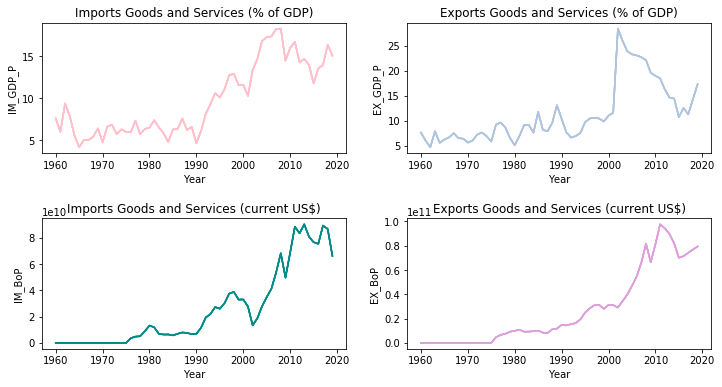

In [127]:
fig, axes = plt.subplots(nrows = 2,
                       ncols = 2,
                       figsize=(12,6))
plt.subplots_adjust(hspace = 0.5)

for ax in axes.flat:

    sns.lineplot(data = country['Argentina'], 
            x = 'Year', 
            y = 'IM_GDP_P',
            color='pink',
            ax=axes[0,0])

    sns.lineplot(data = country['Argentina'], 
            x = 'Year', 
            y = 'EX_GDP_P',
            color='lightsteelblue',
            ax=axes[0,1])

    sns.lineplot(data = country['Argentina'], 
            x = 'Year', 
            y = 'IM_BoP',
            color='darkcyan',
            ax=axes[1,0])

    sns.lineplot(data = country['Argentina'], 
            x = 'Year', 
            y = 'EX_BoP',
            color='plum',
            ax=axes[1,1])

axes[0,0].set_title('Imports Goods and Services (% of GDP)');
axes[0,1].set_title('Exports Goods and Services (% of GDP)');
axes[1,0].set_title('Imports Goods and Services (current US$)');
axes[1,1].set_title('Exports Goods and Services (current US$)');

Argentina is importing much more than it is exporting, creating unequal inflows of  in the BoP. After the 2008 financial crisis, the number of exports began to lower, therefore showing a lower percentage of growth in its GDP. 

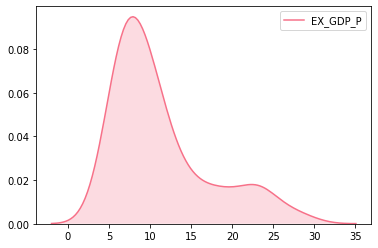

In [70]:
ax = sns.kdeplot(country['Argentina']['EX_GDP_P'], shade=True)

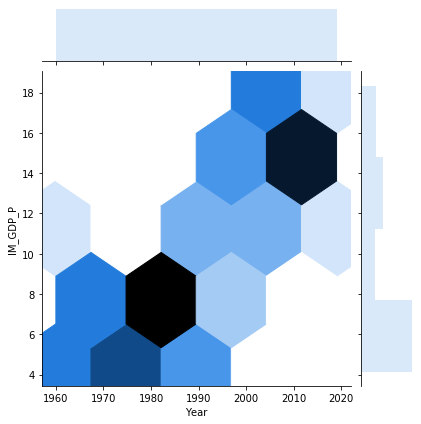

In [128]:
sns.jointplot('Year', 'IM_GDP_P', country['Argentina'], kind='hex')

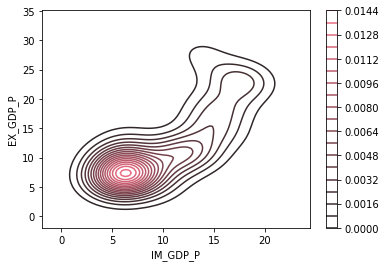

In [90]:
sns.kdeplot(country['Argentina']['IM_GDP_P'], country['Argentina']['EX_GDP_P'], n_levels=20, cbar=True)

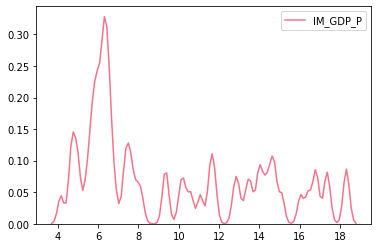

In [89]:
sns.kdeplot(country['Argentina']['IM_GDP_P'], bw=.15)